In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
##using sklearn datasets using fetch_openml and initializing dataset with name 
##mnist contain 28x28 pixel images for each digit, so it contain about 28x28=784 colunms and rows of 70000

In [4]:
mnist


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [5]:
x,y = mnist['data'], mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit=x[3601]
some_digit_image = some_digit.reshape(28,28)
## we have to reshape the matrix as 28x28 

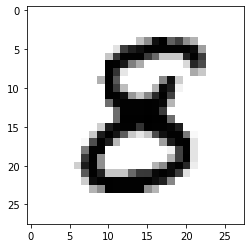

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

In [11]:
y[3601]  ##it shows label of selscted row 20000

'8'

In [12]:
x_train, x_test = x[0:6000], x[6000:7000] ##its a large dataset so im selecting some rows

In [13]:
y_train, y_test = y[:6000], y[6000:7000]

In [14]:
## the dataset maybe in this order first 1ok row as 1 and other are divided in squence
#so here we shuffle it using numpy

In [15]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [16]:
## creating a single number detector

In [17]:
# astype change the true false to exact number present and we are detecting number 7
y_train = y_train.astype(np.int8)
y_test= y_test.astype(np.int8)
y_train7=(y_train==7)
y_test7=(y_test==7)

In [18]:
y_train

array([1, 6, 1, ..., 4, 3, 2], dtype=int8)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol=0.1)

In [20]:
clf.fit(x_train,y_train7)

A:\anaconda-python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.1, verbose=0,
                   warm_start=False)

In [21]:
clf.predict([some_digit])

array([False])

In [22]:
from sklearn.model_selection import cross_val_score

In [25]:
a = cross_val_score(clf, x_train, y_train7, cv=3, scoring="accuracy")

A:\anaconda-python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
A:\anaconda-python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
A:\anaconda-python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
a.mean()

0.9811666666666667